In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
def columns(file, column, top=None):
    
    df = pd.read_pickle(file)
    series = df[f'{column}'].value_counts()
    
    if top == None:
        return series
    else:
        return series.head(top)

In [4]:
def bars(
    wdc, inside, mti, uni, dush, hhs, 
    position=0,
    width = 8,
    height = 4,
    wspace=0.4, 
    hspace=0.8,
    name='', 
    save_as='graphs'
):
    
    fig, ax = plt.subplots(ncols=2, nrows=3)
    ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

    if position == 0:
        
        ax1.bar(wdc.index, wdc.values)
        ax1.set_title(f'1 {name}')

        ax2.bar(inside.index, inside.values)
        ax2.set_title(f'2 {name}')

        ax3.bar(mti.index, mti.values)
        ax3.set_title(f'3 {name}')

        ax4.bar(uni.index, uni.values)
        ax4.set_title(f'4 {name}')

        ax5.bar(dush.index, dush.values)
        ax5.set_title(f'5 {name}')

        ax6.bar(hhs.index, hhs.values)
        ax6.set_title(f'6 {name}')
        
    elif position == 1:
        
        ax1.barh(wdc.index, wdc.values)
        ax1.set_title(f'1 {name}')

        ax2.barh(inside.index, inside.values)
        ax2.set_title(f'2 {name}')

        ax3.barh(mti.index, mti.values)
        ax3.set_title(f'3 {name}')

        ax4.barh(uni.index, uni.values)
        ax4.set_title(f'4 {name}')

        ax5.barh(dush.index, dush.values)
        ax5.set_title(f'5 {name}')

        ax6.barh(hhs.index, hhs.values)
        ax6.set_title(f'6 {name}')

    fig.set_size_inches(width, height)

    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.savefig(f'{save_as}', fmt='png')
    plt.show()

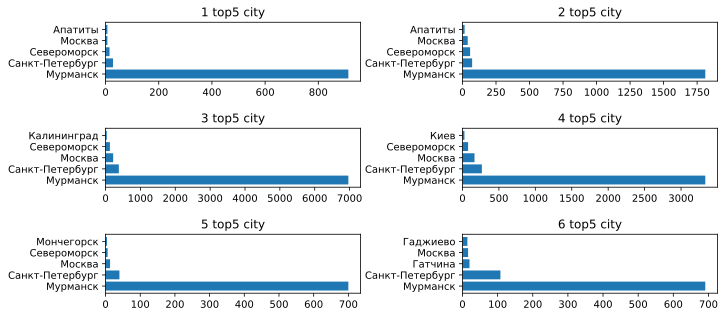

In [5]:
top = 5
column = 'city'
name = 'top5 city'
save_as=f'studios({column})'
bars(
    wdc=columns(file='res_wdc.pkl', column=column, top=top),
    inside=columns(file='res_ins.pkl', column=column, top=top),
    mti=columns(file='res_mti.pkl', column=column, top=top),
    uni=columns(file='res_uni.pkl', column=column, top=top),
    dush=columns(file='res_dus.pkl', column=column, top=top),
    hhs=columns(file='res_mms.pkl', column=column, top=top),
    position=1,
    width=11,
    height=5,
    name=name,
    save_as=save_as
)

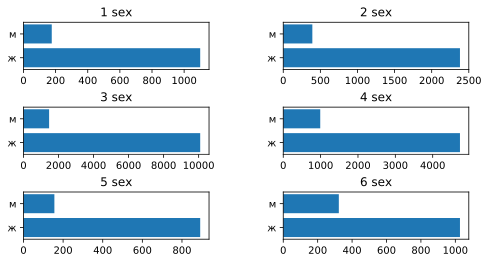

In [6]:
top = None
column = 'sex'
name = 'sex'
save_as=f'studios({column})'
bars(
    wdc=columns(file='res_wdc.pkl', column=column, top=top),
    inside=columns(file='res_ins.pkl', column=column, top=top),
    mti=columns(file='res_mti.pkl', column=column, top=top),
    uni=columns(file='res_uni.pkl', column=column, top=top),
    dush=columns(file='res_dus.pkl', column=column, top=top),
    hhs=columns(file='res_mms.pkl', column=column, top=top),
    position=1,
    name=name,
    save_as=save_as
)

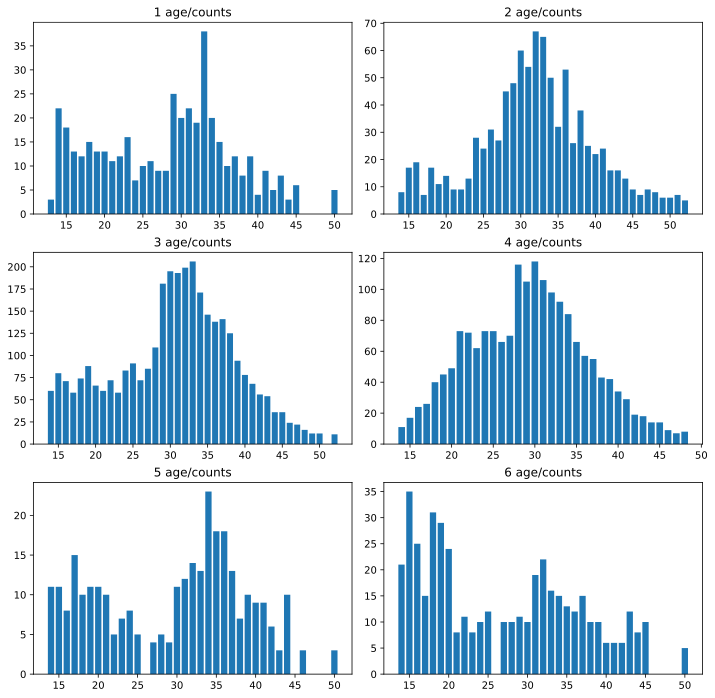

In [7]:
top = None
column = 'age'
name = 'age/counts'
save_as=f'studios({column})'

res_wdc=columns(file='res_wdc.pkl', column=column)
res_inside=columns(file='res_ins.pkl', column=column)
res_mti=columns(file='res_mti.pkl', column=column)
res_uni=columns(file='res_uni.pkl', column=column)
res_dush=columns(file='res_dus.pkl', column=column)
res_hhs=columns(file='res_mms.pkl', column=column)

bars(
    wdc=res_wdc[res_wdc > 2],
    inside=res_inside[res_inside > 4],
    mti=res_mti[res_mti > 8],
    uni=res_uni[res_uni > 4],
    dush=res_dush[res_dush > 2],
    hhs=res_hhs[res_hhs > 4],
    height=12,
    width=12,
    wspace=0.1,
    hspace=0.2,
    save_as=save_as,
    name=name
)